# Exploring Classification 

UCI Machine Learning: Abalone Dataset

https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/

```
abalone.data
```
contains the data points themselves.

```
abalone.names
```
contains the legend for how to go about interpreting the data


In [155]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 

warnings.filterwarnings('ignore')

In [156]:
df = pd.read_csv("abalone.data", header=None)

### Cleaning 

In [157]:
df.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [158]:
# transforming columns into names from abalone.names
df.columns = pd.Index(["Sex","Length","Diameter","Height","Whole_Weight","Shucked_Weight","Viscera_Weight","Shell_Weight","Rings"])

In [159]:
df = df.replace({"M":"Male","F":"Female","I":"Infant"})

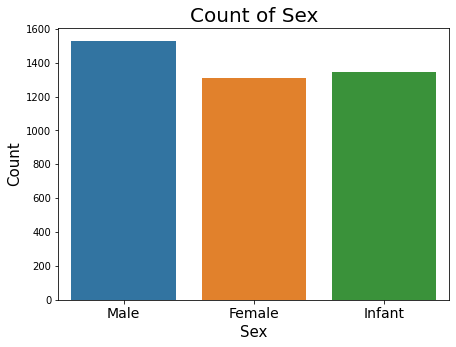

In [160]:
# plotting count of sex's 
fig, ax = plt.subplots(figsize=(7,5))
_ = sns.countplot(df["Sex"])
plt.title("Count of Sex",fontsize=20)
plt.ylabel("Count",fontsize=15)
plt.xlabel("Sex",fontsize=15)
plt.xticks(fontsize=14)
_ = plt.show()

In [161]:
# converting into all numerical types
df = df.replace({"Male":0,"Female":1,"Infant":2})
df.dtypes

Sex                 int64
Length            float64
Diameter          float64
Height            float64
Whole_Weight      float64
Shucked_Weight    float64
Viscera_Weight    float64
Shell_Weight      float64
Rings               int64
dtype: object

In [162]:
df.head()

,Sex,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [163]:
from sklearn.model_selection import train_test_split 

X = df.drop("Sex",axis=1)
y = df["Sex"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=123)

### Multi-class Classification 

- I will use this dataset to try to predict the Sex of the abalone observation, given the rest of the features. 

- Considering this is not a binary classification task, I will explore decision tree, support vector machine, and ensemble methods.

In [164]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# 10-fold cross validation
clf = DecisionTreeClassifier(max_depth=4, random_state=1).fit(X,y)
for fold,score in enumerate(cross_val_score(clf, X, y, cv=10),start=1):
  print(f"fold #{fold}  {score:.3f}\n")

# get feature importances
print("Feature Importances:",clf.feature_importances_)

fold #1  0.462

fold #2  0.512

fold #3  0.622

fold #4  0.565

fold #5  0.543

fold #6  0.522

fold #7  0.612

fold #8  0.506

fold #9  0.597

fold #10  0.566

Feature Importances: [0.02387595 0.01757195 0.00452934 0.05481881 0.032591   0.68303707
 0.00500438 0.17857149]


In [165]:
print("Important predictors for Sex")
feature_importance_pairs = []
for feature,importance in zip(X.columns, clf.feature_importances_):
  print(f"Feature: {feature} | Importance: {importance:%}")
  feature_importance_pairs.append((feature,importance))

Important predictors for Sex
Feature: Length | Importance: 2.387595%
Feature: Diameter | Importance: 1.757195%
Feature: Height | Importance: 0.452934%
Feature: Whole_Weight | Importance: 5.481881%
Feature: Shucked_Weight | Importance: 3.259100%
Feature: Viscera_Weight | Importance: 68.303707%
Feature: Shell_Weight | Importance: 0.500438%
Feature: Rings | Importance: 17.857149%


In [166]:
feature_importance_pairs

[('Length', 0.023875946398535523),
 ('Diameter', 0.017571947519464972),
 ('Height', 0.004529344406531319),
 ('Whole_Weight', 0.054818809993758134),
 ('Shucked_Weight', 0.03259100413381318),
 ('Viscera_Weight', 0.6830370730016162),
 ('Shell_Weight', 0.005004382369855343),
 ('Rings', 0.17857149217642534)]

In [167]:
# taking the top 5 importance features
feature_importance_pairs.sort(key = lambda p: p[1],reverse=True)
feats = [feat for feat,_ in feature_importance_pairs][:5]
feats

['Viscera_Weight', 'Rings', 'Whole_Weight', 'Shucked_Weight', 'Length']

In [168]:
# siphoning importance features out of independent X ~ X_fi 
X_fi = X[feats]
X_fi.head()

,Viscera_Weight,Rings,Whole_Weight,Shucked_Weight,Length
0,0.1010,15,0.5140,0.2245,0.455
1,0.0485,7,0.2255,0.0995,0.350
2,0.1415,9,0.6770,0.2565,0.530
3,0.1140,10,0.5160,0.2155,0.440
4,0.0395,7,0.2050,0.0895,0.330


In [169]:
# making new dataset with these important features 
df = pd.concat((X_fi, y),axis=1)
df

,Viscera_Weight,Rings,Whole_Weight,Shucked_Weight,Length,Sex
0,0.1010,15,0.5140,0.2245,0.455,0
1,0.0485,7,0.2255,0.0995,0.350,0
2,0.1415,9,0.6770,0.2565,0.530,1
3,0.1140,10,0.5160,0.2155,0.440,0
4,0.0395,7,0.2050,0.0895,0.330,2
...,...,...,...,...,...,...
4172,0.2390,11,0.8870,0.3700,0.565,1
4173,0.2145,10,0.9660,0.4390,0.590,0
4174,0.2875,9,1.1760,0.5255,0.600,0
4175,0.2610,10,1.0945,0.5310,0.625,1


In [170]:
X = df.drop("Sex",axis=1)
y = df["Sex"]

In [171]:
# retraining decision tree classifier with important features
clf = DecisionTreeClassifier(max_depth=4, random_state=2)
for fold,score in enumerate(cross_val_score(clf, X, y, cv=10),start=1):
  print(f"fold #{fold}  {score:.3f}\n")

fold #1  0.467

fold #2  0.512

fold #3  0.629

fold #4  0.536

fold #5  0.541

fold #6  0.512

fold #7  0.615

fold #8  0.523

fold #9  0.600

fold #10  0.566



In [172]:
from sklearn.model_selection import train_test_split

# splitting train 80% / test 20%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=3)

# sampling 30% from test data for validation tuning
test = pd.concat((X_test, y_test), axis=1)
validation = test.sample(frac=0.3, random_state=4)

In [173]:
from sklearn import svm

clf = svm.LinearSVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f"accuracy: {(y_pred == y_test).sum()/len(y_pred):0%}")

accuracy: 52.392344%


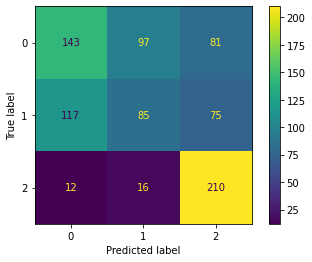

In [174]:
# out of the box linear kernel support vector machine not predicting so well
# let's visualize in confusion matrix
 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [175]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.45      0.48       321
           1       0.43      0.31      0.36       277
           2       0.57      0.88      0.70       238

    accuracy                           0.52       836
   macro avg       0.51      0.54      0.51       836
weighted avg       0.51      0.52      0.50       836



### Review

It appears the support vector machine with a linear kernel and no tuning is doing about the same as the decision trees, though it is a little less accurate than the decision tree classifiers w/o cross validation.

Let's see if standard scaling and changing the kernel increases it at all.

In [176]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = make_pipeline(StandardScaler(), svm.LinearSVC(random_state=4))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f"accuracy: {(y_pred == y_test).sum()/len(y_pred):0%}")

accuracy: 51.913876%


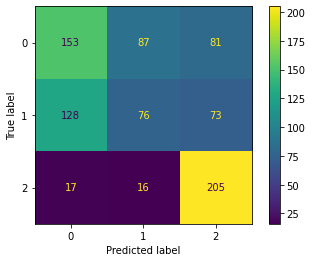

In [177]:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [178]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.48      0.49       321
           1       0.42      0.27      0.33       277
           2       0.57      0.86      0.69       238

    accuracy                           0.52       836
   macro avg       0.50      0.54      0.50       836
weighted avg       0.50      0.52      0.50       836



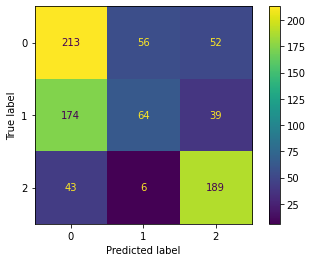

In [179]:
# testing radial basis function kernel
clf = make_pipeline(StandardScaler(), svm.SVC(kernel="rbf", random_state=5))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [180]:
# rbf kernel
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.66      0.57       321
           1       0.51      0.23      0.32       277
           2       0.68      0.79      0.73       238

    accuracy                           0.56       836
   macro avg       0.56      0.56      0.54       836
weighted avg       0.55      0.56      0.53       836



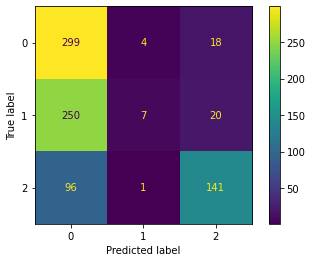

In [181]:
# testing polynomial  kernel
clf = make_pipeline(StandardScaler(), svm.SVC(kernel="poly", random_state=6))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [182]:
# polynomial kernel
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.46      0.93      0.62       321
           1       0.58      0.03      0.05       277
           2       0.79      0.59      0.68       238

    accuracy                           0.53       836
   macro avg       0.61      0.52      0.45       836
weighted avg       0.60      0.53      0.45       836



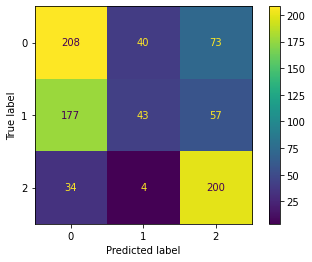

In [183]:
# testing libsvm 'linear' kernel
clf = make_pipeline(StandardScaler(), svm.SVC(kernel="linear", random_state=7))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [184]:
# libsvm linear kernel
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.65      0.56       321
           1       0.49      0.16      0.24       277
           2       0.61      0.84      0.70       238

    accuracy                           0.54       836
   macro avg       0.53      0.55      0.50       836
weighted avg       0.53      0.54      0.49       836



### Review 2 

It appears the accuracy does adjust with the change of kernel and scaling, before tuning hyperparameters, it appears that the 'rbf' kernel under libsvm is producing the highest accuracy score of the bunch.

Let's hyperparameter tune for this configuration and see if it can get better. 

In [203]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

params = {
    "svm__C": [0.01, 0.1, 1, 10, 100],
    "svm__gamma": [1, 0.1, 0.01, 0.001],
    "svm__tol": [1e-3, 1e-4, 1e-5],
}

pipe = Pipeline(steps=[("scaler", StandardScaler()), ("svm", svm.SVC(kernel="rbf",decision_function_shape="ovr"))])
clf = GridSearchCV(pipe, params, refit = True)
clf.fit(X_train, y_train)
print(clf.best_estimator_)

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(C=10, gamma=0.01))])


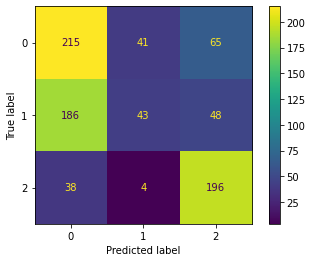

In [205]:
clf = make_pipeline(StandardScaler(), svm.SVC(C=10, gamma=0.01))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [206]:
# libsvm linear kernel
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.67      0.57       321
           1       0.49      0.16      0.24       277
           2       0.63      0.82      0.72       238

    accuracy                           0.54       836
   macro avg       0.54      0.55      0.51       836
weighted avg       0.53      0.54      0.50       836



In [227]:
def relative_accuracy(lab: 'label'):
  right = total = 0
  for a,p in zip(y_test,y_pred):
    if a==lab and p==lab:
      right += 1
    if a==lab:
      total += 1
  return f"{right/total:0%}"

male_acc = relative_accuracy(lab=0)
female_acc = relative_accuracy(lab=1)
infant_acc = relative_accuracy(lab=2)

print(f"Male Accuracy (%) {male_acc}")
print(f"Female Accuracy (%) {female_acc}")
print(f"Infant Accuracy (%) {infant_acc}")

Male Accuracy (%) 66.978193%
Female Accuracy (%) 15.523466%
Infant Accuracy (%) 82.352941%


### Review 3

It appears the overall accuracy dropped a tad after hyperparameter tuning. However, the measure of relative accuracy shows the model is better at predicting infant and male abalone more so than the females accurately. 

Let's break this multi-label classification problems into a series of binary classifications: label vs no label, where label is one of 

``` {'male','female','infant'} ```

with this we can examine the relative performance between each once more, while exploring another classification model such as logistic regression.



In [230]:
# making new datasets 
df2 = pd.read_csv("abalone.data", header=None)

# transforming columns into names from abalone.names
df2.columns = pd.Index(["Sex","Length","Diameter","Height","Whole_Weight","Shucked_Weight","Viscera_Weight","Shell_Weight","Rings"])

df2.head()

,Sex,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [261]:
def break_into_sexes(frame, sex: str):
  """
  breaks up the individual sexes {"M","F","I"}
  into there own dataframes so that binary classification
  can take place.
  """
  sex_mask = frame["Sex"]==sex
  sex = frame[sex_mask]
  not_sex = frame[~sex_mask]
  not_sex["Sex"]=0
  sex["Sex"]=1
  sex_df = pd.concat([sex, not_sex],axis=0)
  sex_df.index = np.arange(0,len(sex_df))
  return sex_df

In [264]:
# male dataframe with males as 1 / rest as 0
male_df = break_into_sexes(df2, sex="M")

# female dataframe with females as 1 / rest as 0 
female_df = break_into_sexes(df2, sex="F")

# infant dataframe with infants as 1 / rest as 0
infant_df = break_into_sexes(df2, sex="I")

### Logistic Regression

Now that the sexes have been split into their own corresponding dataframes. I will use a logistic regression on each dataframe to evaluate how well the model is able to guess the appropriate sex.

I will compare this with the above relativistic accuracy measure from before to see if we get similar or better results.

#### Handling Class Imbalance

Since each sex has now been broken into its own dataset to explore the relative accuracy measure of predicting each, there is bound to be class imbalance. To avoid wrong measure of accuracy, I will balance the classes of each between minority and majority.

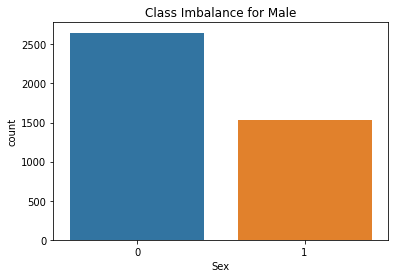

In [272]:
# check for imbalance for male as its probably there
_ = sns.countplot(male_df["Sex"])
plt.title("Class Imbalance for Male")
_ = plt.show()

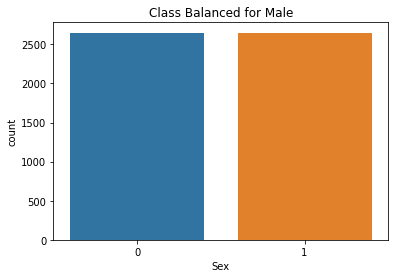

In [283]:
# there is some imbalance between the classes, let's oversample the data to balance
from imblearn.over_sampling import SMOTE

X_male = male_df.drop("Sex",axis=1)
y_male = male_df["Sex"]

male_sm = SMOTE(random_state=100)
X_male,y_male = male_sm.fit_resample(X_male,y_male)

_ = sns.countplot(y_male)
plt.title("Class Balanced for Male")
_ = plt.show()

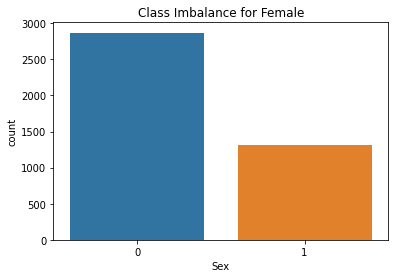

In [275]:
# check for imbalance for female as its probably there
_ = sns.countplot(female_df["Sex"])
plt.title("Class Imbalance for Female")
_ = plt.show()

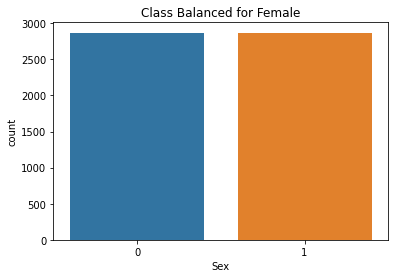

In [282]:
# there is some imbalance between the classes, let's oversample the data to balance
X_female = female_df.drop("Sex",axis=1)
y_female = female_df["Sex"]

female_sm = SMOTE(random_state=100)
X_female,y_female = female_sm.fit_resample(X_female,y_female)

_ = sns.countplot(y_female)
plt.title("Class Balanced for Female")
_ = plt.show()

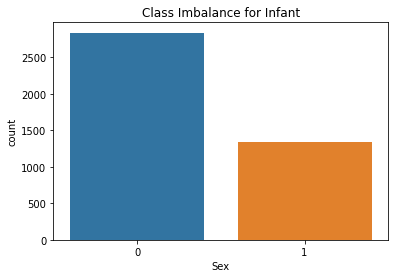

In [278]:
# check for imbalance for infant as its probably there
_ = sns.countplot(infant_df["Sex"])
plt.title("Class Imbalance for Infant")
_ = plt.show()

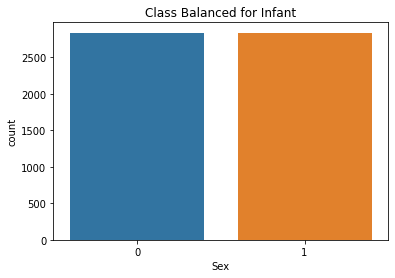

In [284]:
# there is some imbalance between the classes, let's oversample the data to balance
X_infant = infant_df.drop("Sex",axis=1)
y_infant = infant_df["Sex"]

infant_sm = SMOTE(random_state=100)
X_infant,y_infant = infant_sm.fit_resample(X_infant,y_infant)

_ = sns.countplot(y_infant)
plt.title("Class Balanced for Infant")
_ = plt.show()

Male Abalone Exploration 

- In this section I'm going to explore binary classification between male and non-male abalone records to see if a model can accurately predict the difference.

- Here confusion matrix and ROC AUC will be used to measure the model's ability to distinguish 

In [302]:
from sklearn.metrics import RocCurveDisplay

def plot_roc(y_test, y_pred, title="", legend=""):
    RocCurveDisplay.from_predictions(y_test, y_pred, name=legend)
    plt.title(title)
    plt.show()

In [286]:
X_male_train, X_male_test, y_male_train, y_male_test = train_test_split(X_male, y_male, test_size=0.2, random_state=33)

In [288]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(X_male_train, y_male_train)
y_male_pred = clf.predict(X_male_test)
print(classification_report(y_male_test, y_male_pred))

              precision    recall  f1-score   support

           0       0.62      0.60      0.61       538
           1       0.61      0.63      0.62       522

    accuracy                           0.62      1060
   macro avg       0.62      0.62      0.62      1060
weighted avg       0.62      0.62      0.62      1060



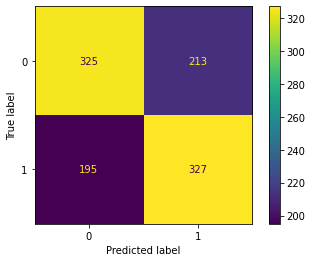

In [291]:
cm = confusion_matrix(y_male_test, y_male_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

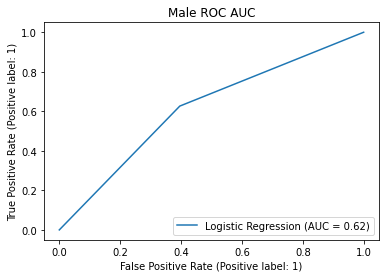

In [303]:
plot_roc(y_male_test, y_male_pred, title="Male ROC AUC", legend="Logistic Regression")

Female Abalone Exploration 

- In this section I'm going to explore binary classification between female and non-female abalone records to see if a model can accurately predict the difference.

- Here confusion matrix and ROC AUC will be used to measure the model's ability to distinguish 

In [292]:
X_female_train, X_female_test, y_female_train, y_female_test = train_test_split(X_female, y_female, test_size=0.2, random_state=44)

In [293]:
clf = LogisticRegression().fit(X_female_train, y_female_train)
y_female_pred = clf.predict(X_female_test)
print(classification_report(y_female_test, y_female_pred))

              precision    recall  f1-score   support

           0       0.69      0.56      0.62       587
           1       0.62      0.73      0.67       561

    accuracy                           0.64      1148
   macro avg       0.65      0.65      0.64      1148
weighted avg       0.65      0.64      0.64      1148



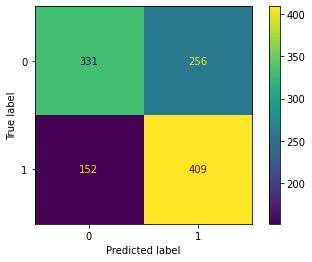

In [294]:
cm = confusion_matrix(y_female_test, y_female_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

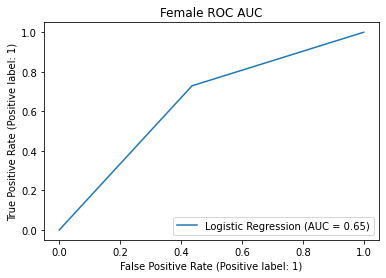

In [304]:
plot_roc(y_female_test, y_female_pred, title="Female ROC AUC", legend="Logistic Regression")

Infant Abalone Exploration 

- In this section I'm going to explore binary classification between Infant and non-Infant abalone records to see if a model can accurately predict the difference.

- Here confusion matrix and ROC AUC will be used to measure the model's ability to distinguish 

In [295]:
X_infant_train, X_infant_test, y_infant_train, y_infant_test = train_test_split(X_infant, y_infant, test_size=0.2, random_state=55)

In [296]:
clf = LogisticRegression().fit(X_infant_train, y_infant_train)
y_infant_pred = clf.predict(X_infant_test)
print(classification_report(y_infant_test, y_infant_pred))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       588
           1       0.78      0.84      0.81       546

    accuracy                           0.81      1134
   macro avg       0.81      0.81      0.81      1134
weighted avg       0.81      0.81      0.81      1134



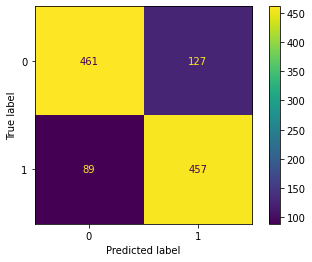

In [298]:
cm = confusion_matrix(y_infant_test, y_infant_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

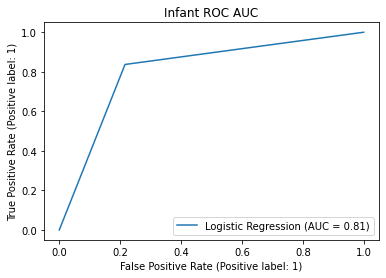

In [306]:
plot_roc(y_infant_test, y_infant_pred, title="Infant ROC AUC", legend="Logistic Regression")

### Review 4

It appears that logistic regression is a fairly good model for predicting in binary classification scenarios. Since breaking up the dataset into individual sexes and marking the "Sex" column to hold only one of two values (1 - indicative sex, 0 - other sex), the accuracy score has went up across the board for all of the sexes.

Still it appears that that infant dataset has the highest marks of the three with respect to the classification report metrics and auc. Which is really interesting even after the classes were balanced. There's something about that data that seems bias (possibly) towards infantile measures. 



## Conclusion

I began the exploration of this dataset with cross validation using a decision tree classifier to calculate feature importance. From there I used the top 5 features as independent features that would later predict the 'Sex' column in a multi-class classification problem.

For this I chose to explore more with a support vector machine using a variety of kernels, with and without tuning, to see if a high accuracy score could be produced. All of the models predicting for male, female, or infant yielded low accuracy scores. With infant leading the three in terms of relative accuracy. 

To explore more of this 'relative' accuracy I decided to split up the data set into three separate binary classification problems, breaking up the data into three sets where each of sexes had a 1 value for the indicative sex (male, female, infant) and 0 value for the other sex (not male, not female, not infant) respective of which sex was being evaluated. 

The binary way of processing the data tended to yield better results. I used a logistic regression model to calculate the accuracy and roc auc of the model for each of the sexes and their respective newly created datasets. Overall it appears the metrics as far as those shown in the classification report and the roc display grew somewhat after the classes were balanced.

In the end, still the infant dataset performed better than the rest reaching a level of accuracy nearly 20% higher than that of the other sexes. Which still raises a lot of questions for me. What is it about the infant dataset that makes it easier to separably predict on? Could there be some bias in the logistic regression model that would make it better for that kind of data? 

Well. It was fun! Until next time python...

